In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Load and preprocess the data
test_set_feat = pd.read_csv('/content/test_set_features.csv', index_col='respondent_id')
train_set_feat = pd.read_csv('/content/training_set_features.csv', index_col='respondent_id')
train_set_lab = pd.read_csv('/content/training_set_labels.csv', index_col='respondent_id')

In [ ]:
# Join train_set_feat and train_set_lab by 'respondent_id' column
train_data = train_set_feat.join(train_set_lab)

In [ ]:
# View Proportion of Missing Data (Descending)
train_data.isna().sum().sort_values(ascending=False)/len(train_data)

employment_occupation          0.504362
employment_industry            0.499120
health_insurance               0.459580
income_poverty                 0.165612
doctor_recc_xyz                0.080878
doctor_recc_seasonal           0.080878
rent_or_own                    0.076459
employment_status              0.054780
marital_status                 0.052720
education                      0.052683
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
opinion_seas_sick_from_vacc    0.020107
opinion_seas_risk              0.019246
opinion_seas_vacc_effective    0.017299
opinion_xyz_sick_from_vacc     0.014790
opinion_xyz_vacc_effective     0.014640
opinion_xyz_risk               0.014528
household_adults               0.009323
household_children             0.009323
behavioral_avoidance           0.007788
behavioral_touch_face          0.004793
xyz_knowledge                  0.004343
xyz_concern                    0.003445


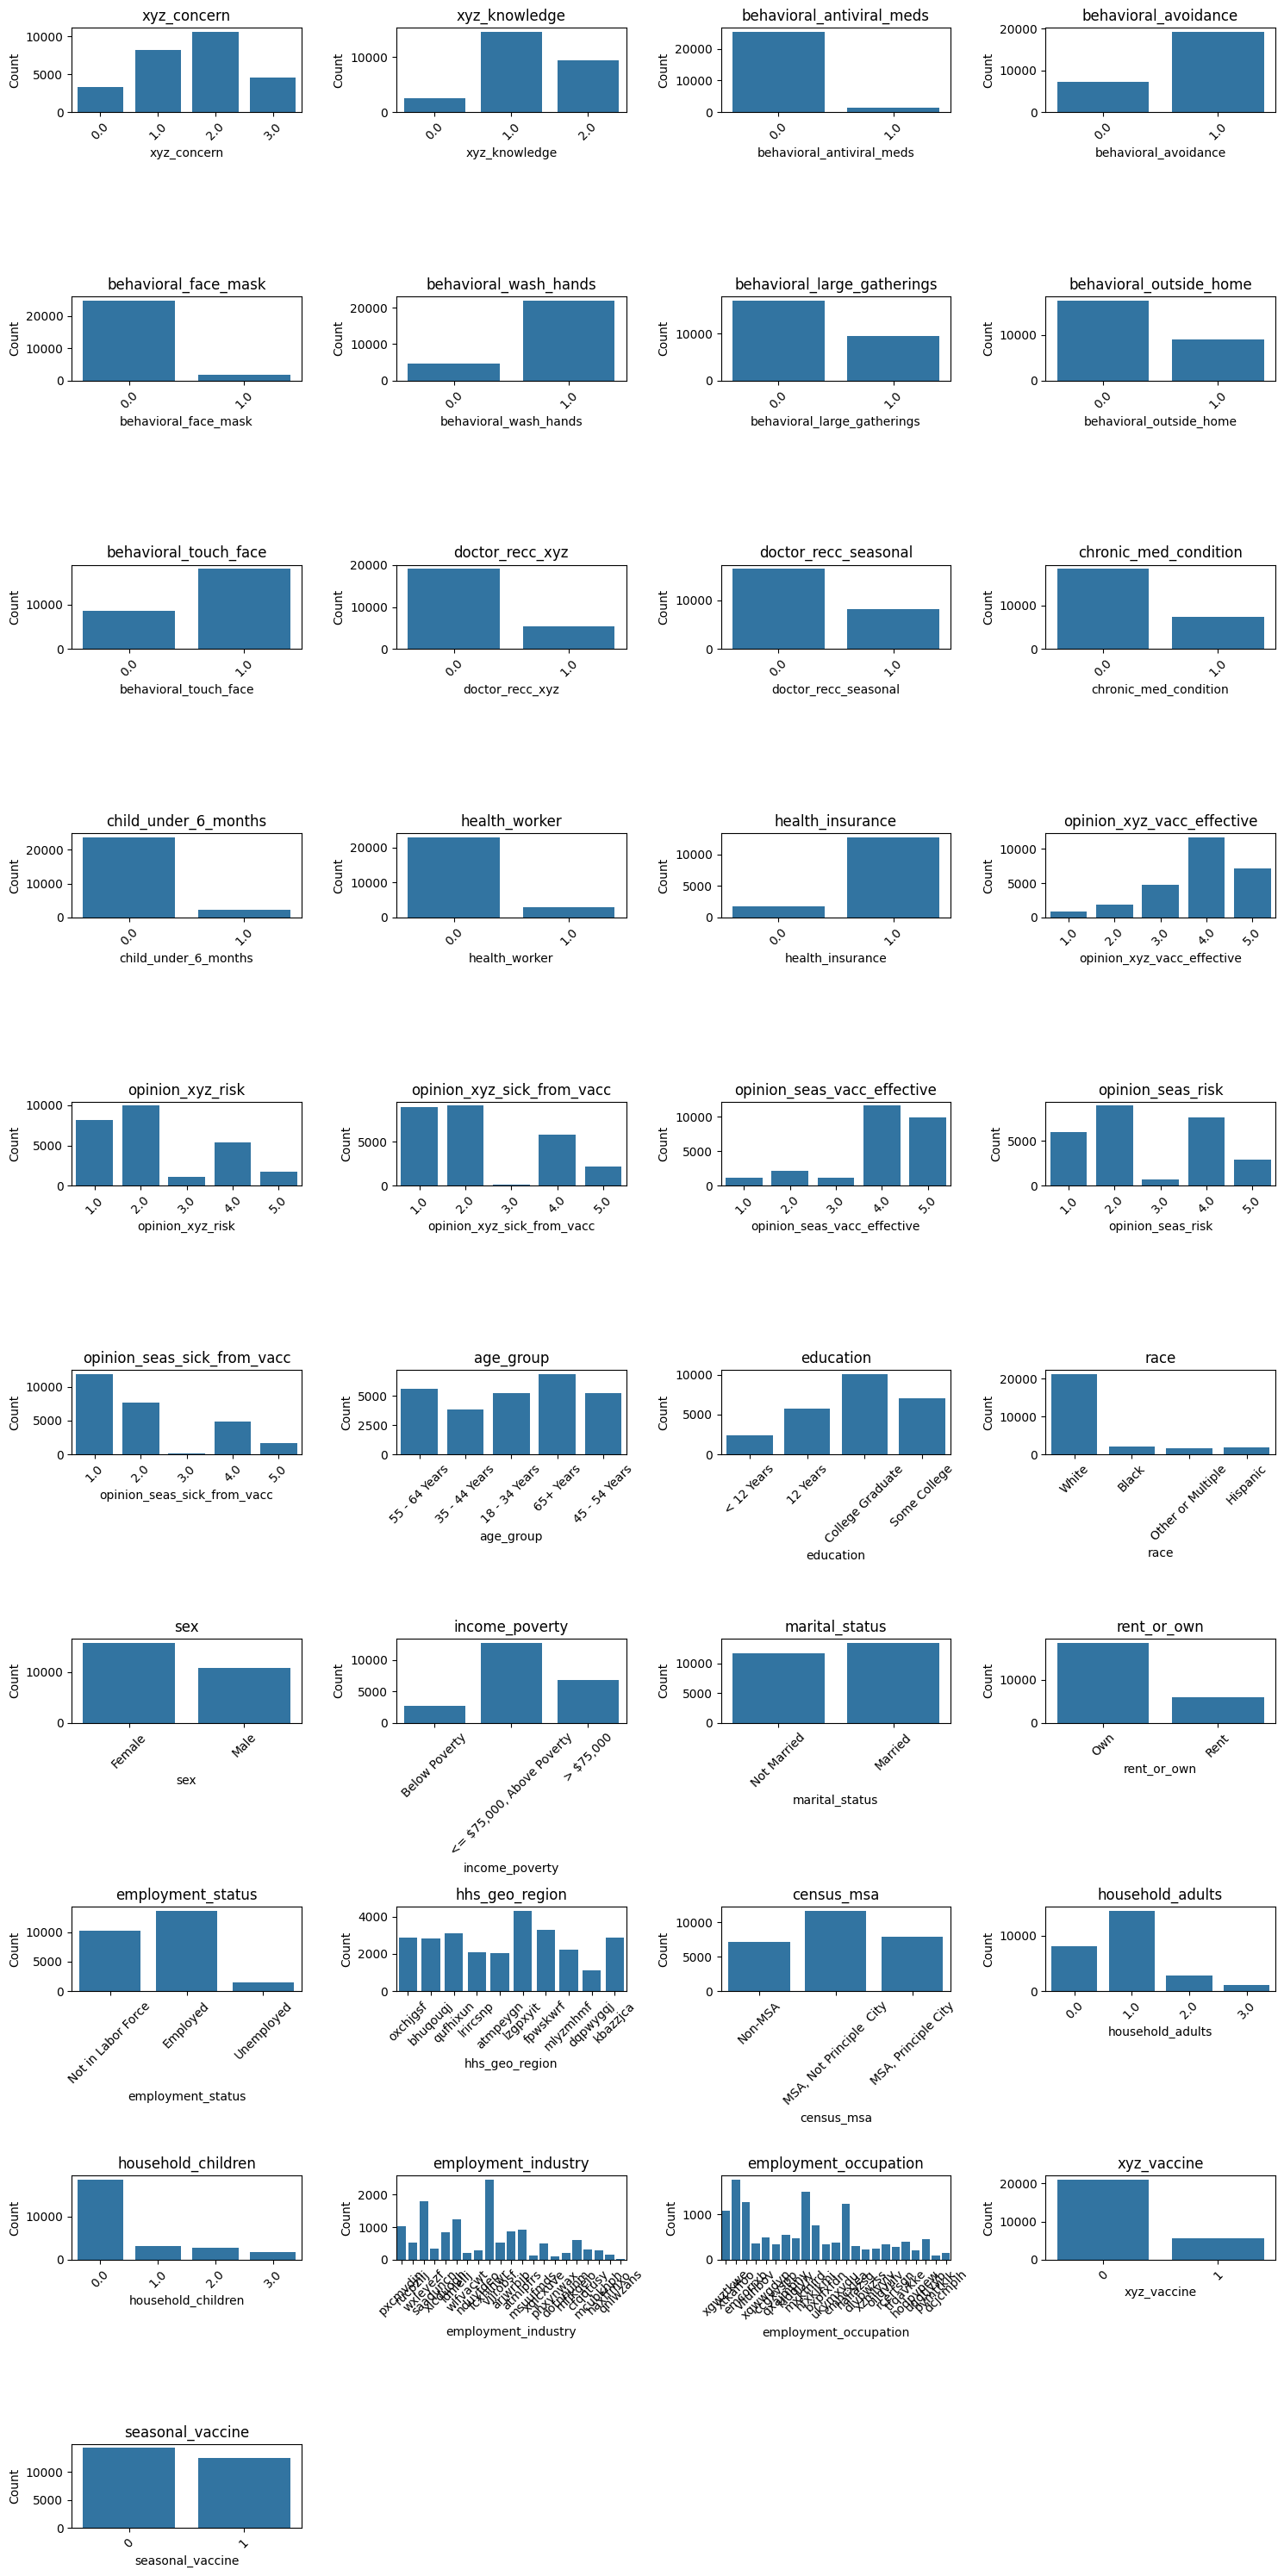

In [ ]:
# Plot Categories
columns = train_data.columns

# Calculate the number of rows and columns for the subplots
num_rows = (len(columns) + 3) // 4
num_cols = min(len(columns), 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

# Flatten the axes array
axes = axes.flatten()

# Generate the distribution plots
for i, column in enumerate(columns):
    sns.countplot(x=column, data=train_data, ax=axes[i])
    axes[i].set_title(f"{column}")
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel("Count")

# Remove any empty subplots
if len(columns) < num_rows * num_cols:
    for j in range(len(columns), num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()